NB reciprocity, min_diversity, max_diversity, mean_diversity only if the graph is direct otherwise can be removed
NB num_farthest_points, mincut_value are always 3 and 0 (I don't know why) maybe could be removed as well

(proviamo con queste, se funziona replichiamo con metriche caso direct e caso pesato (considerare archi multipli)

In [23]:
import pandas as pd

data1 = pd.read_csv("metrics_value.csv")
data2 = pd.read_csv("metrics_time.csv")


In [24]:
data1


,name,order,size,max_degree,mean_degree,diameter,girth,radius,average_path_length,clique_number,...,mean_constraint,max_coreness,mean_coreness,min_eccentricity,max_eccentricity,mean_eccentricity,max_strength,mean_strength,connected_components_strong,connected_components_weak
0,WN18RR,40559,73999,515,3.648956,21,3,1,8.517564,4,...,0.566148,6,2.149930,1.0,21.0,14.959466,515.0,3.648956,122,122
1,WN18,40943,120963,906,5.908849,18,3,1,7.635398,4,...,0.500112,7,3.376352,1.0,18.0,13.417263,906.0,5.908849,22,22
2,FB15k,14951,388529,7490,51.973647,8,3,0,2.773833,24,...,0.124736,64,27.131964,0.0,8.0,5.911310,7490.0,51.973647,9,9
3,FB15k237,14505,231094,6035,31.864047,8,3,0,2.853156,21,...,0.136278,51,16.780145,0.0,8.0,5.519821,6035.0,31.864047,7,7
4,YAGO310,123143,694011,58196,11.271627,12,3,1,3.494854,17,...,0.238006,42,5.906645,1.0,12.0,7.539868,58196.0,11.271627,27,27


In [25]:
data2


,name,order,size,max_degree,mean_degree,diameter,girth,radius,average_path_length,clique_number,...,mean_constraint,max_coreness,mean_coreness,min_eccentricity,max_eccentricity,mean_eccentricity,max_strength,mean_strength,connected_components_strong,connected_components_weak
0,WN18RR,1.907349e-06,0.000000,0.000589,0,46.252825,0.001050,45.740665,49.250320,0.121481,...,0,0.001973,0,43.472083,0,0,0.000587,0,0.003253,0.003010
1,WN18,1.192093e-06,0.000000,0.000369,0,49.159538,0.000037,44.979725,48.496783,0.116246,...,0,0.002523,0,44.098166,0,0,0.000655,0,0.003500,0.003093
2,FB15k,1.192093e-06,0.000000,0.000209,0,11.000619,0.000025,9.498200,10.781597,0.246980,...,0,0.005088,0,9.521385,0,0,0.000324,0,0.003051,0.002377
3,FB15k237,1.907349e-06,0.000001,0.000239,0,8.148672,0.000016,8.235932,8.019345,0.191113,...,0,0.003116,0,8.297259,0,0,0.000225,0,0.002084,0.001516
4,YAGO310,9.536743e-07,0.000000,0.001173,0,523.521364,0.000356,511.421755,521.622894,3.173232,...,0,0.021829,0,506.557062,0,0,0.001493,0,0.014228,0.013195


In [ ]:
data1


In [31]:
columns = data1.columns[1:]

In [42]:
corr = data1[columns].corr()
corr

,order,size,max_degree,mean_degree,diameter,girth,radius,average_path_length,clique_number,len_maximal_cliques,...,mean_constraint,max_coreness,mean_coreness,min_eccentricity,max_eccentricity,mean_eccentricity,max_strength,mean_strength,connected_components_strong,connected_components_weak
order,1.000000,0.714798,0.913112,-0.511890,0.156879,NaN,0.656771,-0.024244,-0.115254,0.826198,...,0.089409,-0.119536,-0.519359,0.656771,0.156879,0.046007,0.913112,-0.511890,0.076352,0.076352
size,0.714798,1.000000,0.925930,0.231574,-0.541217,NaN,-0.029493,-0.683137,0.594552,0.973098,...,-0.601526,0.599656,0.223182,-0.029493,-0.541217,-0.622894,0.925930,0.231574,-0.433769,-0.433769
max_degree,0.913112,0.925930,1.000000,-0.141416,-0.252788,NaN,0.292510,-0.427256,0.298751,0.983839,...,-0.322015,0.292003,-0.149953,0.292510,-0.252788,-0.361333,1.000000,-0.141416,-0.205994,-0.205994
mean_degree,-0.511890,0.231574,-0.141416,1.000000,-0.850008,NaN,-0.929027,-0.775352,0.872752,0.035526,...,-0.833900,0.889527,0.999960,-0.929027,-0.850008,-0.795436,-0.141416,1.000000,-0.591558,-0.591558
diameter,0.156879,-0.541217,-0.252788,-0.850008,1.000000,NaN,0.835629,0.980953,-0.976552,-0.416835,...,0.995107,-0.970177,-0.847498,0.835629,1.000000,0.991562,-0.252788,-0.850008,0.797570,0.797570
girth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius,0.656771,-0.029493,0.292510,-0.929027,0.835629,NaN,1.000000,0.733426,-0.820194,0.119460,...,0.805049,-0.815795,-0.930810,1.000000,0.835629,0.777493,0.292510,-0.929027,0.558612,0.558612
average_path_length,-0.024244,-0.683137,-0.427256,-0.775352,0.980953,NaN,0.733426,1.000000,-0.978789,-0.578863,...,0.993482,-0.971086,-0.771248,0.733426,0.980953,0.996606,-0.427256,-0.775352,0.748180,0.748180
clique_number,-0.115254,0.594552,0.298751,0.872752,-0.976552,NaN,-0.820194,-0.978789,1.000000,0.464184,...,-0.989034,0.997888,0.869303,-0.820194,-0.976552,-0.979636,0.298751,0.872752,-0.671030,-0.671030
len_maximal_cliques,0.826198,0.973098,0.983839,0.035526,-0.416835,NaN,0.119460,-0.578863,0.464184,1.000000,...,-0.483225,0.458482,0.026948,0.119460,-0.416835,-0.517344,0.983839,0.035526,-0.320287,-0.320287


In [43]:
(corr > 0.8).sum()

order                           6
size                            6
max_degree                      7
mean_degree                     9
diameter                        8
girth                           0
radius                          7
average_path_length             6
clique_number                   9
len_maximal_cliques             7
len_largest_cliques             1
motifs_randesu_no               8
num_farthest_points             0
mincut_value                    0
len_feedback_arc_set            6
assortativity_degree            6
density                        10
transitivity_undirected         4
reciprocity                     0
min_diversity                   0
max_diversity                   0
mean_diversity                  0
mean_authority_score           10
mean_hub_score                 10
min_closeness                   9
min_constraint                  6
max_constraint                  4
mean_constraint                 8
max_coreness                    9
mean_coreness 

<Axes: >

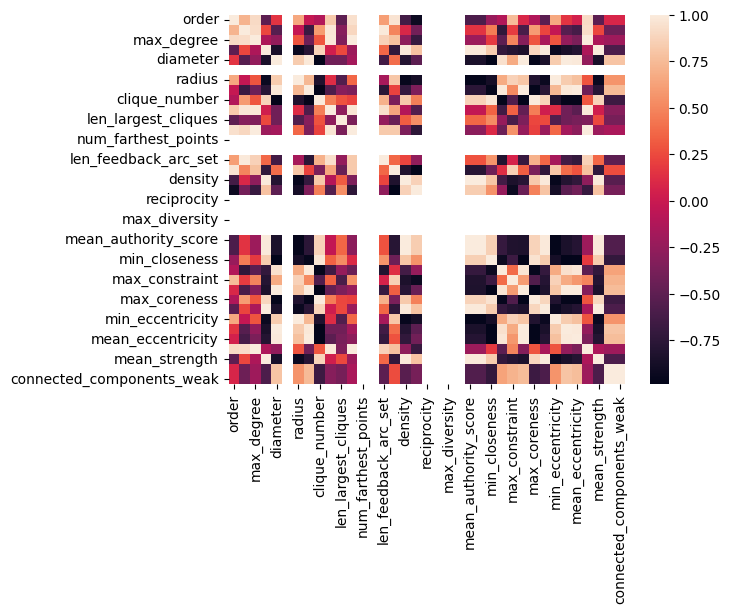

In [38]:
import seaborn as ss
ss.heatmap(corr)
